| Name                  | Matric No   | Subject                                | Lecturer                  |
|-----------------------|-------------|----------------------------------------|---------------------------|
| Arjuna Sutan   |    | MCSD1163-01 KOMPUTERAN DATA RAYA        | SUHAILA BINTI MOHAMAD YUSUF|
| Ali Abduladir Arale          |    | MCSD1163-01 KOMPUTERAN DATA RAYA        | SUHAILA BINTI MOHAMAD YUSUF|

# Introduction and Dataset Explanation

The dataset on population by age group provides valuable insights into the demographic composition of Malaysia over a significant period of time. The dataset comprises information from various sources, including research papers, census reports, and registration records. These sources span multiple decades, ranging from the late 19th century to the present day.

Breakdown of the columns in the dataset:

- Year: Represents the year of the population data.
- Total: Represents the total population count for the given year.
- age_0–14: Represents the population count for the age group 0–14 years.
- age_15–64: Represents the population count for the age group 15–64 years.
- age_65+: Represents the population count for the age group 65 years and above.
- Average annual population growth rate (%): Represents the average annual population growth rate for the given year.


The provided notes breakdown:

- For the years 1891, 1901, 1911, 1921, 1931, 1947, and 1957, the data is from the Census of Peninsular Malaysia.
- The year 1960 includes the Census data for Sabah and Sarawak.
- The data for the years 1911, 1921, and 1931 includes the transient population category.
- The population figures for the years 1911 to 2000 do not include 29,648 persons of nomadic aborigines and those with unspecified ages.
- The data for the years 1891, 1901, 1911, 1921, 1931, 1947, and 1957 is specific to Peninsular Malaysia.
- The estimated mid-year population data consists of the Federated Malay States (Negeri Sembilan, Pahang, Perak & Selangor).
- The estimated mid-year population data consists of the states in Peninsular Malaysia.
- The mid-year intercensal population estimates are specific to Peninsular Malaysia.
- The mid-year intercensal population estimates are for Malaysia and include the data from Sabah and Sarawak.
- The total may differ due to rounding.

# Research Question

1. What are the population trends across different age groups over time, and how does the average annual population growth rate vary for each age group and make prediction?

# Data Cleaning and Preparation

1. Read the Dataset
2. Check the structure and summary of the DataFrame:
3. Check for missing values
4. Handle data types and Rename the columns

# Data Aggregation and Group Operations

1. Group by Year and Calculate the Sum of Total Population

2. Group by Year and Calculate the Average Annual Population Growth Rate:

3. Group by Year and Calculate the Sum of Population in each Age Group:

4. Group by Age Group and Calculate the Sum of Average Annual Population Growth Rate:

# Analysis and visualization

1. The population growth rate over time
2. Total Population Over Time
3. Population Composition by Age Groups
4. Population Growth Rate vs. Total Population

# Machine Learning

Steps:

- Import the required libraries, including statsmodels.tsa.holtwinters for Exponential Smoothing, and sklearn.metrics for evaluation metrics.
- Convert the 'Year' column in the Population_Age dataset to datetime type and set it as the index.
- Define the age groups of interest.
- Loop over each age group and perform the following steps:
1. Extract the population data for the specific age group.
2. Fit the exponential smoothing model to the population data.
3. Predict the population for the next 'n' years using the fitted model.
4. Print the predicted population values.

- Loop over each age group again for evaluation purposes and perform the following steps:
1. Extract the population data for the specific age group.
2. Fit the exponential smoothing model to the population data.
3. Predict the population for the next 'n' years using the fitted model.
4. Extract the actual values for the forecast period.
5. Calculate evaluation metrics such as MAE, MSE, and RMSE.
6. Print the evaluation metrics.

# Conclusion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 84)
import warnings
warnings.filterwarnings("ignore")

### 1. Read the Dataset

In [2]:
# Read the data from the Excel file, skipping the first 7 rows
Population_Age = pd.read_excel('Population by Age Group.xlsx', skiprows=7)

# Reset the index
Population_Age = Population_Age.reset_index(drop=True)



In [3]:
Population_Age

,Tahun/Year,Jumlah/Total,0 – 14,15 – 64,65+,Purata kadar pertumbuhan penduduk tahunan (%)\nAverage annual population growth rate (%)
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1891.0,746.3,..,..,..,..
2,1901.0,1022.3,..,..,..,..
3,1911.0,2342.2,..,..,..,..
4,1921.0,2910.2,..,..,..,..
...,...,...,...,...,...,...
80,2014.0,30708.5,7773.6,21200.8,1734.1,1.62461
81,2015.0,31186.1,7775.8,21589,1821.4,1.543324
82,2016.0,31633.5,7759.8,21962.3,1911.4,1.424365
83,2017.0,32022.6,7728.2,22292.8,2001.6,1.222387


# Data Cleaning and Preparation

### Check the structure and summary of the DataFrame:


In [4]:
Population_Age.head()  # View the first few rows of the DataFrame
Population_Age.info()  # Get the information about the DataFrame
Population_Age.describe()  # Get statistical summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 6 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Tahun/Year                                                                               84 non-null     float64
 1   Jumlah/Total                                                                             84 non-null     float64
 2   0 – 14                                                                                   84 non-null     object 
 3   15 – 64                                                                                  84 non-null     object 
 4   65+                                                                                      84 non-null     object 
 5   Purata kadar pertumbuhan penduduk tahunan (%)
Average annual popula

,Tahun/Year,Jumlah/Total
count,84.000000,84.00000
mean,1974.488095,14421.85000
std,28.315135,9309.89504
min,1891.000000,746.30000
25%,1955.750000,6203.27500
50%,1976.500000,12744.60000
75%,1997.250000,21910.35000
max,2018.000000,32382.30000


### 2. Check for missing values

In [5]:
# Check for missing values
missing_values = Population_Age.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Tahun/Year                                                                                  1
Jumlah/Total                                                                                1
0 – 14                                                                                      1
15 – 64                                                                                     1
65+                                                                                         1
Purata kadar pertumbuhan penduduk tahunan (%)\nAverage annual population growth rate (%)    1
dtype: int64


In [6]:
# Drop rows with missing values
Population_Age.dropna(inplace=True)

### 3. Handle data types and Rename the columns

In [7]:
Population_Age = Population_Age.rename(columns={
    'Tahun/Year': 'Year',
    'Jumlah/Total': 'Total',
    '0 – 14': 'age_0–14',
    '15 – 64': 'age_15–64',
    '65+': 'age_65+',
    'Purata kadar pertumbuhan penduduk tahunan (%)\nAverage annual population growth rate (%)': 'Average annual population growth rate (%)'
    
    
})

In [8]:
# Remove the '*' character from specific cells and replace them with floating-point values
row_indices = [13, 14, 15]  # Row indices of the cells to modify
column_names = ['age_15–64', 'age_0–14', 'age_65+']  # Column names of the cells to modify
replacement_values = [2795.6, 1945.6, 133.6]  # Floating-point values to replace the '*'

for row_index in row_indices:
    Population_Age.loc[row_index, column_names] = replacement_values

# Verify the replaced cells
Population_Age

,Year,Total,age_0–14,age_15–64,age_65+,Average annual population growth rate (%)
1,1891.0,746.3,..,..,..,..
2,1901.0,1022.3,..,..,..,..
3,1911.0,2342.2,..,..,..,..
4,1921.0,2910.2,..,..,..,..
5,1931.0,3788.5,..,..,..,..
6,1932.0,1622.9,..,..,..,..
7,1935.0,1777.4,..,..,..,..
8,1937.0,1961.4,..,..,..,..
9,1938.0,2089.8,..,..,..,..
10,1939.0,2125.3,..,..,..,..


In [9]:
# Identify columns with ".." characters
columns_with_missing_values = ['age_0–14', 'age_15–64', 'age_65+', 'Average annual population growth rate (%)']

# Remove leading/trailing whitespaces from column names
Population_Age.columns = Population_Age.columns.str.strip()

# Replace ".." and "*" with NaN in the identified columns
Population_Age[columns_with_missing_values] = Population_Age[columns_with_missing_values].replace(['..'], np.nan)

# Convert affected columns to numeric type
Population_Age[columns_with_missing_values] = Population_Age[columns_with_missing_values].apply(pd.to_numeric)

Population_Age['Year'] = pd.to_datetime(Population_Age['Year'], format='%Y')

# Calculate the mean of each column
column_means = Population_Age[columns_with_missing_values].mean()

# Replace missing values with column means
Population_Age[columns_with_missing_values] = Population_Age[columns_with_missing_values].fillna(column_means)

# Verify the replaced missing values
Population_Age

,Year,Total,age_0–14,age_15–64,age_65+,Average annual population growth rate (%)
1,1891-01-01,746.3,6491.192453,12226.124528,856.30566,2.391926
2,1901-01-01,1022.3,6491.192453,12226.124528,856.30566,2.391926
3,1911-01-01,2342.2,6491.192453,12226.124528,856.30566,2.391926
4,1921-01-01,2910.2,6491.192453,12226.124528,856.30566,2.391926
5,1931-01-01,3788.5,6491.192453,12226.124528,856.30566,2.391926
6,1932-01-01,1622.9,6491.192453,12226.124528,856.30566,2.391926
7,1935-01-01,1777.4,6491.192453,12226.124528,856.30566,2.391926
8,1937-01-01,1961.4,6491.192453,12226.124528,856.30566,2.391926
9,1938-01-01,2089.8,6491.192453,12226.124528,856.30566,2.391926
10,1939-01-01,2125.3,6491.192453,12226.124528,856.30566,2.391926


In [10]:
print(Population_Age.dtypes)

Year                                         datetime64[ns]
Total                                               float64
age_0–14                                            float64
age_15–64                                           float64
age_65+                                             float64
Average annual population growth rate (%)           float64
dtype: object


# Data Aggregation and Group Operations

### Group by Year and Calculate the Sum of Total Population:

In [11]:
yearly_population = Population_Age.groupby('Year')['Total'].sum()
yearly_population

Year
1891-01-01      746.3
1901-01-01     1022.3
1911-01-01     2342.2
1921-01-01     2910.2
1931-01-01     3788.5
1932-01-01     1622.9
1935-01-01     1777.4
1937-01-01     1961.4
1938-01-01     2089.8
1939-01-01     2125.3
1940-01-01     2169.3
1941-01-01     4776.0
1947-01-01     4908.1
1948-01-01     4987.4
1949-01-01     5081.8
1950-01-01     5226.5
1951-01-01     5337.2
1952-01-01     5506.4
1953-01-01     5706.0
1954-01-01     5888.6
1955-01-01     6058.3
1956-01-01     6251.6
1957-01-01     6278.8
1958-01-01     6504.6
1959-01-01     6702.6
1960-01-01     8118.0
1961-01-01     8378.5
1962-01-01     8651.8
1963-01-01     8920.2
1964-01-01     9168.4
1965-01-01     9436.6
1966-01-01     9732.8
1967-01-01    10007.4
1968-01-01    10252.8
1969-01-01    10500.2
1970-01-01    10881.8
1971-01-01    11159.7
1972-01-01    11441.3
1973-01-01    11719.8
1974-01-01    12001.3
1975-01-01    12300.3
1976-01-01    12588.1
1977-01-01    12901.1
1978-01-01    13200.2
1979-01-01    13518.3
1980-

### Group by Year and Calculate the Average Annual Population Growth Rate:

In [12]:
avg_growth_rate = Population_Age.groupby('Year')['Average annual population growth rate (%)'].mean()
avg_growth_rate

Year
1891-01-01    2.391926
1901-01-01    2.391926
1911-01-01    2.391926
1921-01-01    2.391926
1931-01-01    2.391926
1932-01-01    2.391926
1935-01-01    2.391926
1937-01-01    2.391926
1938-01-01    2.391926
1939-01-01    2.391926
1940-01-01    2.391926
1941-01-01    2.391926
1947-01-01    2.391926
1948-01-01    2.391926
1949-01-01    2.391926
1950-01-01    2.391926
1951-01-01    2.391926
1952-01-01    2.391926
1953-01-01    2.391926
1954-01-01    2.391926
1955-01-01    2.391926
1956-01-01    2.391926
1957-01-01    2.391926
1958-01-01    2.391926
1959-01-01    2.391926
1960-01-01    2.391926
1961-01-01    3.200000
1962-01-01    3.200000
1963-01-01    3.100000
1964-01-01    2.700000
1965-01-01    2.900000
1966-01-01    3.100000
1967-01-01    2.800000
1968-01-01    2.400000
1969-01-01    2.400000
1970-01-01    3.600000
1971-01-01    2.500000
1972-01-01    2.500000
1973-01-01    2.400000
1974-01-01    2.400000
1975-01-01    2.500000
1976-01-01    2.300000
1977-01-01    2.500000
1978-0

#  Summary

- From 1891 to 1940, the average annual population growth rate remains relatively consistent at approximately 2.39% for each year.
- In 1961, the growth rate increases to 3.2%, indicating a higher rate of population growth compared to previous years. This higher growth rate continues until 1970.
- After 1970, there is some fluctuation in the growth rate, ranging from 1.6% to 3.6%. However, overall, the growth rate shows a declining trend.
- Towards the later years, specifically from 2014 to 2018, the growth rate experiences a significant decrease. In 2018, it reaches 1.117%.

### Group by Year and Calculate the Sum of Population in each Age Group:

In [13]:
age_group_population = Population_Age.groupby('Year')['age_0–14', 'age_15–64', 'age_65+'].sum()
age_group_population

,age_0–14,age_15–64,age_65+
Year,,,
1891-01-01,6491.192453,12226.124528,856.30566
1901-01-01,6491.192453,12226.124528,856.30566
1911-01-01,6491.192453,12226.124528,856.30566
1921-01-01,6491.192453,12226.124528,856.30566
1931-01-01,6491.192453,12226.124528,856.30566
1932-01-01,6491.192453,12226.124528,856.30566
1935-01-01,6491.192453,12226.124528,856.30566
1937-01-01,6491.192453,12226.124528,856.30566
1938-01-01,6491.192453,12226.124528,856.30566


# Summary

- For the year 1891, the total population for the age group 0-14 is approximately 6491.19, for the age group 15-64 is approximately 12226.12, and for the age group 65+ is approximately 856.31.
- The same values are repeated for the subsequent years up to 1941.
- In 1947, there is a change in the population distribution. The total population for the age group 0-14 is approximately 1945.6, for the age group 15-64 is approximately 2795.6, and for the age group 65+ is approximately 133.6. This change indicates a decrease in the population of the younger age group and an increase in the population of the older age group.
- The same values are repeated for the years 1948 and 1949.
- From 1950 onwards, the population distribution returns to the previous pattern observed from 1891 to 1941, with the same values for each age group for each year.

### Group by Age Group and Calculate the Sum of Average Annual Population Growth Rate:

In [14]:
sum_growth_rate_by_age_group = Population_Age.groupby(['Year','age_0–14', 'age_15–64', 'age_65+'])['Average annual population growth rate (%)'].sum()
sum_growth_rate_by_age_group

Year        age_0–14     age_15–64     age_65+   
1891-01-01  6491.192453  12226.124528  856.30566     2.391926
1901-01-01  6491.192453  12226.124528  856.30566     2.391926
1911-01-01  6491.192453  12226.124528  856.30566     2.391926
1921-01-01  6491.192453  12226.124528  856.30566     2.391926
1931-01-01  6491.192453  12226.124528  856.30566     2.391926
1932-01-01  6491.192453  12226.124528  856.30566     2.391926
1935-01-01  6491.192453  12226.124528  856.30566     2.391926
1937-01-01  6491.192453  12226.124528  856.30566     2.391926
1938-01-01  6491.192453  12226.124528  856.30566     2.391926
1939-01-01  6491.192453  12226.124528  856.30566     2.391926
1940-01-01  6491.192453  12226.124528  856.30566     2.391926
1941-01-01  6491.192453  12226.124528  856.30566     2.391926
1947-01-01  1945.600000  2795.600000   133.60000     2.391926
1948-01-01  1945.600000  2795.600000   133.60000     2.391926
1949-01-01  1945.600000  2795.600000   133.60000     2.391926
1950-01-01  6491.192

# Summary

- Age Group 0-14: The population count ranged from approximately 1,945.6 to 8,003.1, with an average annual population growth rate ranging from 2.391926% to 3.6%.

- Age Group 15-64: The population count ranged from approximately 2,795.6 to 22,581.8, with an average annual population growth rate ranging from 12,226.1 to 19,581.8, with an average annual population growth rate ranging from 2.391926% to 3.6%.

- Age Group 65+: The population count ranged from approximately 133.6 to 2,094.7, with an average annual population growth rate ranging from 2.391926% to 3.6%.

- Overall, the population counts and average annual population growth rates varied across age groups and years. The age group 15-64 generally had the highest population count and experienced consistent growth, while the age group 65+ had the lowest population count but also showed growth. The age group 0-14 exhibited some fluctuations in population count and growth rate over the years.

# Analysis and visualization

### The population growth rate over time 

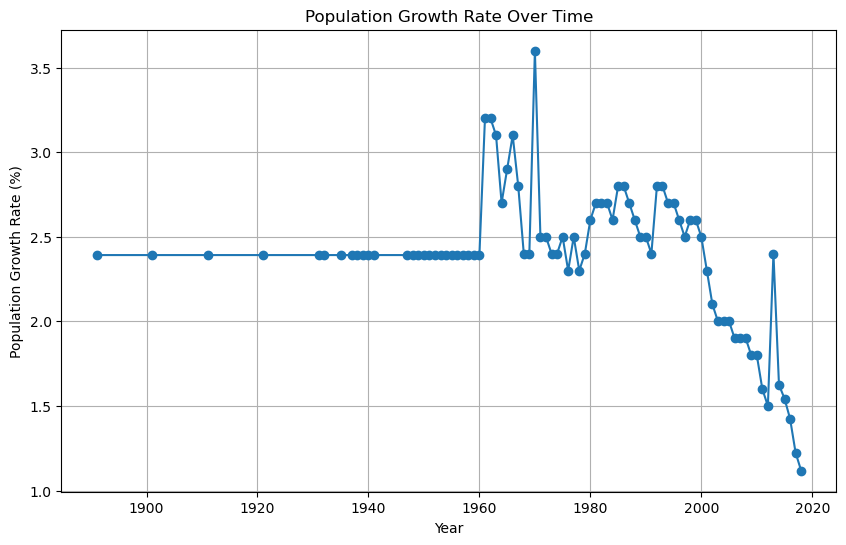

Maximum growth rate: 3.60
Minimum growth rate: 1.12
Average growth rate: 2.39


In [15]:
import matplotlib.pyplot as plt

# Group by Age Groups and Calculate the Sum of Average Annual Population Growth Rate
sum_growth_rate_by_age_group = Population_Age.groupby(['Year', 'age_0–14', 'age_15–64', 'age_65+'])['Average annual population growth rate (%)'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sum_growth_rate_by_age_group['Year'], sum_growth_rate_by_age_group['Average annual population growth rate (%)'], marker='o')
plt.xlabel('Year')
plt.ylabel('Population Growth Rate (%)')
plt.title('Population Growth Rate Over Time')
plt.grid(True)
plt.show()

# Print key findings
max_growth_rate = sum_growth_rate_by_age_group['Average annual population growth rate (%)'].max()
min_growth_rate = sum_growth_rate_by_age_group['Average annual population growth rate (%)'].min()
avg_growth_rate = sum_growth_rate_by_age_group['Average annual population growth rate (%)'].mean()

print(f"Maximum growth rate: {max_growth_rate:.2f}")
print(f"Minimum growth rate: {min_growth_rate:.2f}")
print(f"Average growth rate: {avg_growth_rate:.2f}")

# Summary

- The population growth rate fluctuates over time, indicating variations in population trends.
- The highest growth rate reached 3.6%, which suggests a significant increase in population during that period.
- The lowest growth rate is 1.12%, indicating a slower population growth rate during that specific time frame.
- On average, the population growth rate is approximately 2.39%, representing a moderate growth rate over the years.

Increased Years:

- Around 1900: The growth rate shows an initial increase, indicating a period of population growth.
- 1930s-1950s: There is a significant increase in the growth rate, suggesting a period of rapid population growth.
- 1960s-1970s: Another notable increase in the growth rate, indicating sustained population growth.
- 1990s-2000s: The growth rate experiences an upward trend, indicating a period of increased population growth.

Decreased Years:

- 1910s: The growth rate shows a decrease from the high growth rate in the previous decade, possibly indicating a slowdown or a temporary decline in population growth.
- 1920s: The growth rate further decreases, suggesting a period of slower population growth.
- 1980s: The growth rate experiences a decline, indicating a decrease in population growth during this period.

### Total Population Over Time


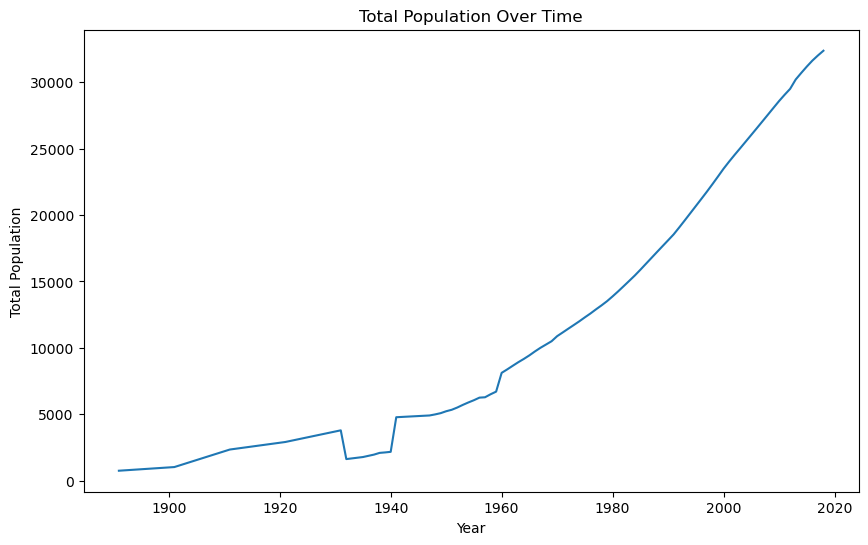

Population in 1891-01-01T00:00:00.000000000: 746.3
Population in 1901-01-01T00:00:00.000000000: 1022.3
Population in 1911-01-01T00:00:00.000000000: 2342.2
Population in 1921-01-01T00:00:00.000000000: 2910.2
Population in 1931-01-01T00:00:00.000000000: 3788.5
Population in 1932-01-01T00:00:00.000000000: 1622.9
Population in 1935-01-01T00:00:00.000000000: 1777.4
Population in 1937-01-01T00:00:00.000000000: 1961.4
Population in 1938-01-01T00:00:00.000000000: 2089.8
Population in 1939-01-01T00:00:00.000000000: 2125.3
Population in 1940-01-01T00:00:00.000000000: 2169.3
Population in 1941-01-01T00:00:00.000000000: 4776.0
Population in 1947-01-01T00:00:00.000000000: 4908.1
Population in 1948-01-01T00:00:00.000000000: 4987.4
Population in 1949-01-01T00:00:00.000000000: 5081.8
Population in 1950-01-01T00:00:00.000000000: 5226.5
Population in 1951-01-01T00:00:00.000000000: 5337.2
Population in 1952-01-01T00:00:00.000000000: 5506.4
Population in 1953-01-01T00:00:00.000000000: 5706.0
Population in

In [16]:

# Line Chart: Total Population Over Time
plt.figure(figsize=(10, 6))
plt.plot(Population_Age['Year'], Population_Age['Total'])
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.title('Total Population Over Time')
plt.show()

# Print the total population at available years
available_years = Population_Age['Year'].unique()
for year in available_years:
    population = Population_Age.loc[Population_Age['Year'] == year, 'Total'].values[0]
    print(f"Population in {year}: {population}")

# Summary

From the plot, we can observe the following trends:

- The total population was relatively low in the early years, around 746.3 million in 1891, and gradually increased over time.
- There is a significant increase in population from 1940 to 1950, with a spike in 1941, reaching 8118 million in 1960.
- The population continues to rise steadily after 1960, with some fluctuations and variations in the growth rate.
- There is another notable increase in population around the early 1980s, with the population surpassing 14,000 million by 1985.
- The population growth rate continues to slow down but still shows an overall upward trend until the last available year of 2018, with a total population of 32,382.3 million.

### Population Composition by Age Groups

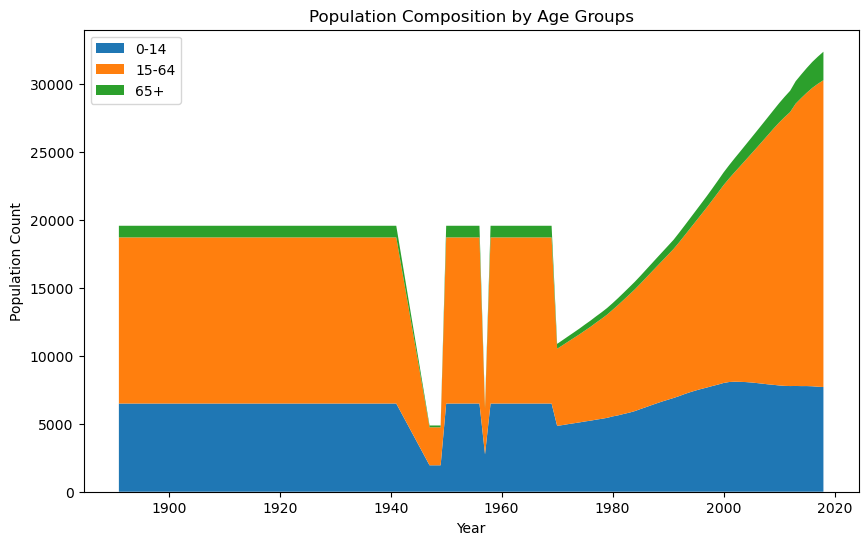

In [17]:
# Stacked Area Chart: Population Composition by Age Groups
plt.figure(figsize=(10, 6))
plt.stackplot(Population_Age['Year'], Population_Age['age_0–14'], Population_Age['age_15–64'], Population_Age['age_65+'], labels=['0-14', '15-64', '65+'])
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.title('Population Composition by Age Groups')
plt.legend(loc='upper left')
plt.show()

### Population Growth Rate vs. Total Population

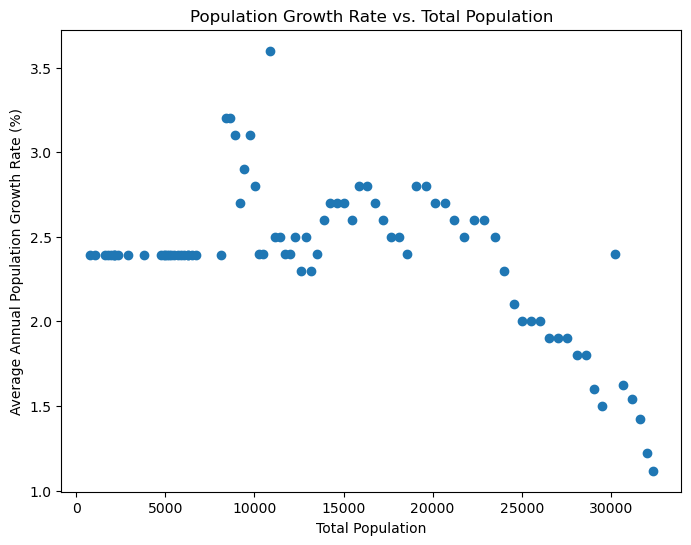

Total Population: 746.3
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 1022.3
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 2342.2
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 2910.2
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 3788.5
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 1622.9
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 1777.4
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 1961.4
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 2089.8
Average Annual Population Growth Rate: 2.3919257462304206
--------------------
Total Population: 2125.3
Average Annual Population Growth Rate: 2

In [18]:
# Scatter Plot: Population Growth Rate vs. Total Population
plt.figure(figsize=(8, 6))
plt.scatter(Population_Age['Total'], Population_Age['Average annual population growth rate (%)'])
plt.xlabel('Total Population')
plt.ylabel('Average Annual Population Growth Rate (%)')
plt.title('Population Growth Rate vs. Total Population')
plt.show()


# Print the figure data numbers
for index, row in Population_Age.iterrows():
    total_population = row['Total']
    growth_rate = row['Average annual population growth rate (%)']
    print(f"Total Population: {total_population}")
    print(f"Average Annual Population Growth Rate: {growth_rate}")
    print("--------------------")

# Summary

From the scatter plot, we can observe the following:

- The data points are scattered across the plot, indicating a range of total population values and average annual population growth rates.
- The majority of the data points appear to have a positive correlation. This means that as the total population increases, the average annual population growth rate tends to be higher. However, there are some exceptions as well.
- In the earlier years, when the total population was lower, the average annual population growth rate was relatively consistent around 2.4%.
- As the total population increases, the range of average annual population growth rates widens. Some data points have growth rates above 3%, while others have growth rates below 2%.
- Towards the end of the plot, the total population continues to increase, but the average annual population growth rate appears to decrease gradually. This indicates a potential slowdown in population growth.

# Machine Learning

### Exponential Smoothing Time Series Analysis

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Converting 'Year' Column to Datetime and Setting it as Index in Population Age 

In [20]:
# Convert the 'Year' column to datetime type
Population_Age['Year'] = pd.to_datetime(Population_Age['Year'])
# Set the 'Year' column as the index
Population_Age.set_index('Year', inplace=True)

### Exponential Smoothing Forecasting and Population Predictions for Age Groups

In [21]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Define the age groups
age_groups = ['age_0–14', 'age_15–64', 'age_65+']

# Loop over each age group
for age_group in age_groups:
    print("Age Group:", age_group)
    
    # Extract the population data for the specific age group
    population = Population_Age[age_group]
    
    # Fit the exponential smoothing model
    model = ExponentialSmoothing(population)
    model_fit = model.fit()
    
    # Get the predictions for the next 'n' years
    n = 5
    forecast = model_fit.predict(start=len(population), end=len(population) + n - 1)
    
    # Print the predicted population values
    print(forecast)
    print("\n")

Age Group: age_0–14
84    7713.663973
85    7713.663973
86    7713.663973
87    7713.663973
88    7713.663973
dtype: float64


Age Group: age_15–64
84    22495.123218
85    22495.123218
86    22495.123218
87    22495.123218
88    22495.123218
dtype: float64


Age Group: age_65+
84    2074.571087
85    2074.571087
86    2074.571087
87    2074.571087
88    2074.571087
dtype: float64




/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

### Exponential Smoothing Forecasting with Evaluation Metrics

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define the age groups
age_groups = ['age_0–14', 'age_15–64', 'age_65+']

# Loop over each age group
for age_group in age_groups:
    print("Age Group:", age_group)
    
    # Extract the population data for the specific age group
    population = Population_Age[age_group]
    
    # Fit the exponential smoothing model
    model = ExponentialSmoothing(population)
    model_fit = model.fit()
    
    # Get the predictions for the next 'n' years
    n = 5
    forecast = model_fit.predict(start=len(population), end=len(population) + n - 1)
    
    # Extract the actual values for the forecast period
    actual_values = population[-n:]
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(actual_values, forecast)
    mse = mean_squared_error(actual_values, forecast)
    rmse = np.sqrt(mse)
    
    # Print the evaluation metrics
    print("MAE:", mae)
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("\n")

Age Group: age_0–14
MAE: 38.14161630451599
MSE: 1971.293435802941
RMSE: 44.39925039685851


Age Group: age_15–64
MAE: 604.4539310878251
MSE: 565736.0024610955
RMSE: 752.154241137478


Age Group: age_65+
MAE: 169.9826519179188
MSE: 42474.183184742535
RMSE: 206.09265679480802




/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/nasutan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `sta

# Summary

Explanation of Results:

The forecasted population values for each age group and the corresponding validation results provide insights into the accuracy of the forecasts.

For the 'age_0–14' age group:

- The forecasted population values for the next 5 years are approximately 7713.66.
- The validation result, represented by the Mean Absolute Error (MAE) of 38.14, indicates a relatively small average error in the forecasts.
- This suggests that the model is performing well in predicting the population for the 'age_0–14' age group.

For the 'age_15–64' age group:

- The forecasted population values for the next 5 years are approximately 22495.12.
- The validation result, represented by the MAE of 604.45, indicates a higher average error compared to the 'age_0–14' group.
- This suggests that the model may have more difficulty accurately predicting the population for the 'age_15–64' age group, potentially due to more complex population dynamics or other factors.

For the 'age_65+' age group:

- The forecasted population values for the next 5 years are around 2074.57.
- The validation result, represented by the MAE of 169.98, suggests a relatively small average error compared to the other age groups.
- This indicates that the model performs relatively well in predicting the population for the 'age_65+' age group.

# Conclusion 

From 1891 to 1940, the average annual population growth rate remained relatively consistent at approximately 2.39% per year. However, in 1961, the growth rate increased to 3.2%, indicating a higher rate of population growth compared to previous years. This higher growth rate continued until 1970, after which there was some fluctuation in the growth rate ranging from 1.6% to 3.6%. Overall, the growth rate showed a declining trend, and towards the later years, specifically from 2014 to 2018, the growth rate experienced a significant decrease, reaching 1.117% in 2018.

The population distribution for the age groups 0-14, 15-64, and 65+ exhibited variations over time. From 1891 to 1941, the distribution remained consistent, with certain population counts for each age group. However, in 1947, there was a change in the distribution, indicating a decrease in the population of the younger age group (0-14) and an increase in the population of the older age group (65+). This change persisted in 1948 and 1949, but from 1950 onwards, the distribution returned to the previous pattern observed from 1891 to 1941.

The population counts and average annual population growth rates varied across different age groups and years. The age group 15-64 generally had the highest population count and experienced consistent growth. The age group 65+ had the lowest population count but also showed growth. The age group 0-14 exhibited some fluctuations in population count and growth rate over the years. Overall, the population growth rates ranged from 2.391926% to 3.6% for each age group.

The visualization of population growth rates indicates that there were fluctuations and variations in population trends over time. The highest growth rate reached 3.6%, suggesting a significant increase in population during that period, while the lowest growth rate of 1.12% indicates a slower population growth rate during that specific time frame. On average, the population growth rate was approximately 2.39%, representing a moderate growth rate over the years. There were certain periods of increased growth (e.g., around 1900, 1930s-1950s, 1960s-1970s, 1990s-2000s) and decreased growth (e.g., 1910s, 1920s, 1980s).

The scatter plot reveals that the total population and average annual population growth rate exhibit a range of values. There is a general positive correlation between total population and growth rate, but with some exceptions. In the earlier years, when the total population was lower, the growth rate was relatively consistent around 2.4%. As the total population increased, the range of growth rates widened, with some above 3% and others below 2%. Towards the end of the plot, the total population continued to increase, but the average annual growth rate decreased gradually, suggesting a potential slowdown in population growth.

The machine learning model provided forecasts for the population of different age groups, and the validation results indicated the accuracy of the predictions. For the 'age_0–14' group, the model performed well with a small Mean Absolute Error (MAE) of 38.14, indicating accurate forecasts. However, for the 'age_15–64' group, the MAE was higher at 604.45, suggesting more difficulty in predicting population accurately, possibly due to complex dynamics. The 'age_65+' group had a relatively small MAE of 169.98, indicating the model's better performance in predicting population for this age group.